# Initialization and Data

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook as TN
import seaborn as sns
import imageio
import time
from IPython.display import HTML
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [0]:
mycmap=clr.LinearSegmentedColormap.from_list('', ['red','yellow','green','blue'])
np.random.seed(0)

In [5]:
data, labels=make_blobs(n_samples=1500, n_features=2, centers=4)
print(data.shape, labels.shape)

(1500, 2) (1500,)


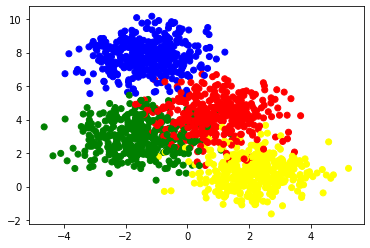

In [6]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=mycmap)

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(data, labels, stratify=labels)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1125, 2) (1125,) (375, 2) (375,)


In [0]:
enc=OneHotEncoder()


In [9]:
Y_train_oh=enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
Y_test_oh=enc.fit_transform(np.expand_dims(Y_test,1)).toarray()
print(Y_train_oh.shape, Y_test_oh.shape)

(1125, 4) (375, 4)


In [10]:
  ## INITIALIZING a W1 and W2 for [2,4] FF Neural Network
  W1=np.random.randn(2,2)
  W2=np.random.randn(2,4)
  print(W1.shape, W2.shape)

(2, 2) (2, 4)


# FFN

In [0]:
class FFN:
  def __init__(self, W1, W2):
    self.params={}
    self.params['W1']=W1.copy()
    self.params['W2']=W2.copy()
    self.params['B1']=np.zeros((1,2))
    self.params['B2']=np.zeros((1,4))
    self.num_layers=2
    self.gradients={}
    self.update_params={}
    self.prev_update_params={}
    s=self
    for i in range(1, self.num_layers+1):
      self.update_params['vw'+str(i)]=0
      self.update_params['vb'+str(i)]=0
      self.update_params['mw'+str(i)]=0
      self.update_params['mw'+str(i)]=0
      self.prev_update_params['vw'+str(i)]=0
      self.prev_update_params['vb'+str(i)]=0
  
  def sigmoid(self, x):
    return (1/(1+np.exp(-x)))
  
  def grad(self, x):
    return x*(1-x)
  
  def softmax(self,x):
    exps=np.exp(x)
    return(exps/np.sum(exps , axis=1).reshape(-1,1))
  
  def forward_pass(self, X, params=None):
    if params is None:
      params=self.params
    
    self.A1=np.matmul(X, params['W1']) + params['B1']
    self.H1=self.sigmoid(self.A1)
    self.A2=np.matmul(self.H1, params['W2'])+params['B2']
    self.H2=self.softmax(self.A2)
    return self.H2
  
  def grad_calc(self, X, Y, params=None):
    if params is None:
      params=self.params
      self.forward_pass(X, params)
      m=X.shape[0]
      self.gradients['dA2']=self.H2-Y
      self.gradients['dW2']=np.matmul(self.H1.T, self.gradients['dA2'])
      self.gradients['dB2']=np.sum(self.gradients['dA2'], axis=0).reshape(1,-1)
      self.gradients['dH1']=np.matmul(self.gradients['dA2'], params['W2'].T)
      self.gradients['dA1']=np.multiply(self.gradients['dH1'], self.grad(self.H1))
      self.gradients['dW1']=np.matmul(X.T, self.gradients('dA1'))
      self.gradients['dB1']=np.sum(self.gradients['dA1'], axis=0).reshape(1, -1)

  def fit(self, X, Y, epochs)



4
